In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Sun Dec 09 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
print(PROJ_ROOT)
print(DATA_ROOT)
print(PROCESSED_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)

/home/kovar/thesis_project
/home/kovar/thesis_project/data
/home/kovar/thesis_project/data/processed
Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


<ipython-input-2-feebbbdfcce0>:29: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 14991
Maximal epsilon in the moment= 4.214327e+01


TISEAN 3.0.0 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

d2: Estimates the correlation sum, -dimension and -entropy

Using /tmp/pytisean_temp_2018-12-09-14-18-44_c0qkfosv/inFile as datafile!
Using columns: 1 
Use 15001 lines.



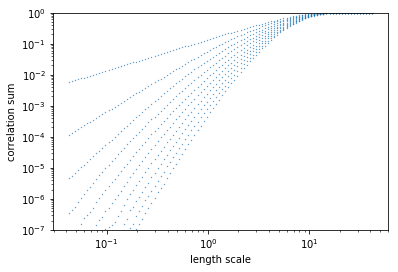

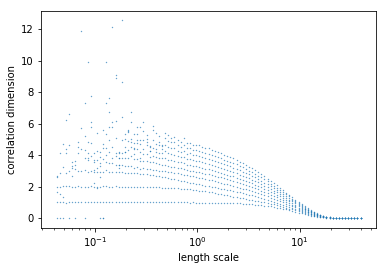

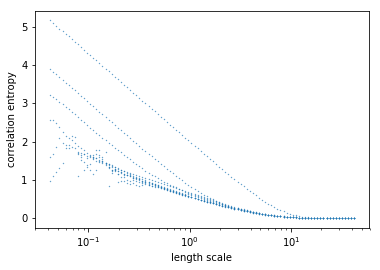

In [3]:
from pytisean import tiseano, tiseanio

# generate Lorenz
# stdout, msg = tiseano("lorenz", "-l", "2000")

# Multiple output command example (d2)
d2_out, msg = tiseanio("d2", '-N', '0','-c', "1", data=data[0])

# plot output c2
plt.scatter(d2_out["c2"][:,0], d2_out["c2"][:,1],s=0.1)
plt.yscale('log')
plt.ylim([1e-7,1])
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation sum")
plt.show()
# plot output d2
plt.scatter(d2_out["d2"][:,0], d2_out["d2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation dimension")
plt.show()
# plot output h2
plt.scatter(d2_out["h2"][:,0], d2_out["h2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation entropy")
plt.show()

In [4]:
d2_out["c2"]

array([[4.214327e+01, 1.000000e+00],
       [3.930295e+01, 1.000000e+00],
       [3.665406e+01, 9.999998e-01],
       ...,
       [4.845452e-02, 0.000000e+00],
       [4.518884e-02, 0.000000e+00],
       [4.214327e-02, 0.000000e+00]])